In [4]:
import tqdm
import pandas as pd
import torch
import numpy as np
from transformers import BertTokenizer, BertForSequenceClassification, DistilBertTokenizerFast
from torch.optim import AdamW as TorchAdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import string
import emoji
import re


import spacy
from bs4 import BeautifulSoup
import gensim
from gensim.models import Word2Vec
import numpy as np
import string
import unidecode
import nltk
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import ast


In [5]:

METAFEATURES = ['word_count', 'unique_word_count', 'stop_word_count', 'mean_word_length',
                'char_count', 'punctuation_count']

In [6]:
labels = pd.read_csv("processed_with_extra_remove_train.csv")["class"]

In [7]:
bert_train = pd.read_csv("bert_train.csv")
bert_test = pd.read_csv("bert_test.csv")

nltk_train = pd.read_csv("train_sentiment.csv")
nltk_test = pd.read_csv("test_sentiment.csv")

meta_train = pd.read_csv("meta_train.csv")
meta_test = pd.read_csv("meta_test.csv")

In [8]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()

def str_to_list(row):
    row["pred"] = ast.literal_eval(row["pred"])[1]
    row["nltk"] = ast.literal_eval(row["nltk"])[1]
    return row;



df_train["pred"] = bert_train["pred"].to_list()
df_train["nltk"] = nltk_train["sentiment"].to_list()
for col in meta_train.columns: df_train[col] = meta_train[col]

df_test["pred"] = bert_test["pred"].to_list()
df_test["nltk"] = nltk_test["sentiment"].to_list()
for col in meta_test.columns: df_test[col] = meta_test[col]


df_train["pred"] = df_train["pred"].apply(lambda x: ast.literal_eval(x)[1])
df_train["nltk"] = df_train["nltk"].apply(lambda x: ast.literal_eval(x)[1])
df_test["pred"] = df_test["pred"].apply(lambda x: ast.literal_eval(x)[1])
df_test["nltk"] = df_test["nltk"].apply(lambda x: ast.literal_eval(x)[1])


In [9]:
df_train

,pred,nltk,word_count,unique_word_count,stop_word_count,mean_word_length,char_count,punctuation_count
0,0.146257,0.000,250,180,97,5.196000,1548,38
1,0.390084,0.000,264,178,109,4.481061,1446,42
2,-0.195175,0.000,254,181,108,4.464567,1387,49
3,0.025689,0.010,694,416,232,4.965418,4139,189
4,0.037763,0.000,116,87,47,4.698276,660,24
...,...,...,...,...,...,...,...,...
70570,0.144780,0.000,305,218,121,4.881967,1793,86
70571,-0.205982,0.000,538,360,185,4.842007,3142,118
70572,0.549287,0.000,669,412,282,4.992526,4008,121
70573,-0.233120,0.000,212,132,102,4.353774,1134,30


In [10]:
df_test

,pred,nltk,word_count,unique_word_count,stop_word_count,mean_word_length,char_count,punctuation_count
0,0.054522,0.00,192,131,63,5.786458,1302,26
1,-0.179671,0.00,165,120,54,5.260606,1032,22
2,0.374162,0.00,275,200,96,5.832727,1878,39
3,0.178563,0.01,189,145,65,5.904762,1304,28
4,0.076252,0.00,585,351,254,5.331624,3703,104
...,...,...,...,...,...,...,...,...
36664,-0.220971,0.00,209,146,79,5.555024,1369,36
36665,-0.029468,0.00,310,210,100,5.483871,2009,43
36666,0.028458,0.00,267,169,89,5.250936,1668,47
36667,-0.023009,0.00,16,16,3,6.500000,119,3


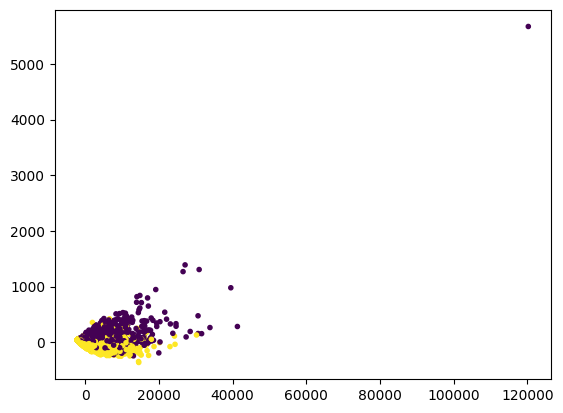

In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

points = PCA(n_components=2).fit_transform(df_train)
plt.scatter(points[:, 0], points[:, 1], c=labels, marker='.')


In [12]:
import sklearn.neural_network




mlp = sklearn.neural_network.MLPClassifier(verbose=1, hidden_layer_sizes=(100, 100)).fit(df_train, labels)


Iteration 1, loss = 2.07691171
Iteration 2, loss = 1.04448570
Iteration 3, loss = 1.10526852
Iteration 4, loss = 0.77658539
Iteration 5, loss = 0.91836476
Iteration 6, loss = 0.92428731
Iteration 7, loss = 0.70607837
Iteration 8, loss = 0.84603440
Iteration 9, loss = 0.76615296
Iteration 10, loss = 0.62588739
Iteration 11, loss = 0.60572091
Iteration 12, loss = 0.61388157
Iteration 13, loss = 0.58264344
Iteration 14, loss = 0.62736153
Iteration 15, loss = 0.62503810
Iteration 16, loss = 0.54174173
Iteration 17, loss = 0.53351900
Iteration 18, loss = 0.54319887
Iteration 19, loss = 0.58696119
Iteration 20, loss = 0.49164874
Iteration 21, loss = 0.53252950
Iteration 22, loss = 0.49482086
Iteration 23, loss = 0.44272800
Iteration 24, loss = 0.55073993
Iteration 25, loss = 0.46955937
Iteration 26, loss = 0.44020736
Iteration 27, loss = 0.51712640
Iteration 28, loss = 0.48971720
Iteration 29, loss = 0.47071048
Iteration 30, loss = 0.40161162
Iteration 31, loss = 0.40128779
Iteration 32, los

/home/tudor/Documents/Work_AI/.venv-3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [13]:
mlp.score(df_train, labels)

0.8850017711654269

In [14]:
pred = mlp.predict(df_test)

In [15]:
pred

array([False, False, False, ..., False,  True, False])

In [16]:
ans = pd.DataFrame()

ans["id"] = range(len(df_test))
ans["class"] = pred

ans.to_csv("ans_1.csv", index=False)

In [17]:
ans

,id,class
0,0,False
1,1,False
2,2,False
3,3,False
4,4,False
...,...,...
36664,36664,False
36665,36665,False
36666,36666,False
36667,36667,True
